##  **Intro to Neuronal Networks**

- The easier way to implement neuronal networks in python is by using [tensorflow](https://www.tensorflow.org/api_docs/python/tf)

In [97]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras import models, layers, utils
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

## **Data preprocessing**

In [2]:
df = pd.read_csv('co_properties.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)

In [3]:
def categoricas(df,lista):
    dummies= pd.get_dummies(df[lista])
    df=df.drop(columns=lista)
    data = pd.concat([df, dummies], axis=1)
    return data

In [4]:
df=df[df['operation_type']=='Venta']
df=df[df['property_type']=='Casa']
df=df[df['currency']=='COP']

In [5]:
df=df.drop(columns=['l6','id','ad_type','start_date','created_on','l1','l2','l3','end_date','title','price_period','title','description','property_type','operation_type','currency'])

In [6]:
df=df.dropna()

In [7]:
df=categoricas(df,['l4','l5'])

## **Training a simple neuronal net**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['price']),df['price'], test_size=0.10,
                                                    random_state=200,
                                                    shuffle=True)

- Tensorflow [activation functions](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

In [35]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

- Tensorflow [optimization algorithms](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                408       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 13        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 0s 437us/step - loss: 3570545538824667136.0000 - mse: 3570545538824667136.0000 - mae: 1277107968.0000
Epoch 2/10
24/24 [==============================] - 0s 374us/step - loss: 3570545538824667136.0000 - mse: 3570545538824667136.0000 - mae: 1277107840.0000
Epoch 3/10
24/24 [==============================] - 0s 416us/step - loss: 3570545263946760192.0000 - mse: 3570545263946760192.0000 - mae: 1277107712.0000
Epoch 4/10
24/24 [==============================] - 0s 415us/step - loss: 3570544989068853248.0000 - mse: 3570544989068853248.0000 - mae: 1277107840.0000
Epoch 5/10
24/24 [==============================] - 0s 416us/step - loss: 3570544439313039360.0000 - mse: 3570544439313039360.0000 - mae: 1277107968.0000
Epoch 6/10
24/24 [==============================] - 0s 374us/step - loss: 3570544164435132416.0000 - mse: 3570544164435132416.0000 - mae: 1277107712.0000
Epoch 7/10
24/24 [==============================] - 0s 416us/step - loss: 35

In [19]:
model.predict(x_test)

array([[  238.92166 ],
       [  335.23306 ],
       [  331.54697 ],
       [  109.565216],
       [  181.75293 ],
       [   98.78418 ],
       [  208.8902  ],
       [   87.615524],
       [  170.6031  ],
       [  412.3058  ],
       [  195.53407 ],
       [  303.83218 ],
       [  405.36758 ],
       [  186.58954 ],
       [  165.30122 ],
       [  202.66719 ],
       [  109.54754 ],
       [  171.24567 ],
       [  200.9419  ],
       [  296.7846  ],
       [  238.92166 ],
       [  234.30765 ],
       [  139.0601  ],
       [  111.00985 ],
       [  200.79613 ],
       [  432.68295 ],
       [  152.05772 ],
       [   98.50466 ],
       [  191.15411 ],
       [  138.18324 ],
       [  363.1761  ],
       [  237.08383 ],
       [  186.51848 ],
       [  394.68954 ],
       [  327.20657 ],
       [  180.31114 ],
       [  196.99464 ],
       [  290.76364 ],
       [  291.00803 ],
       [  186.92137 ],
       [  198.41457 ],
       [  231.6258  ],
       [  232.18213 ],
       [  2

In [21]:
mse(y_test, model.predict(x_test))

2.8196922113210255e+18

## **Adding more layers to neuronal net**

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(215, activation='linear'))
model.add(Dense(40, activation='linear'))
model.add(Dense(215, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                408       
_________________________________________________________________
dense_23 (Dense)             (None, 215)               2795      
_________________________________________________________________
dense_24 (Dense)             (None, 40)                8640      
_________________________________________________________________
dense_25 (Dense)             (None, 215)               8815      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 216       
Total params: 20,874
Trainable params: 20,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=100)

- Adding a validation set to the model fitting

In [44]:
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 0s 5ms/step - loss: 854678150938886144.0000 - mse: 854678150938886144.0000 - mae: 547097728.0000 - val_loss: 87675690517555838976.0000 - val_mse: 87675690517555838976.0000 - val_mae: 1470813952.0000
Epoch 2/100
24/24 [==============================] - 0s 997us/step - loss: 854157188585750528.0000 - mse: 854157188585750528.0000 - mae: 548612800.0000 - val_loss: 86123743049089548288.0000 - val_mse: 86123743049089548288.0000 - val_mae: 1457751296.0000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 855086894386511872.0000 - mse: 855086894386511872.0000 - mae: 540231872.0000 - val_loss: 83652577471523454976.0000 - val_mse: 83652577471523454976.0000 - val_mae: 1437802624.0000
Epoch 4/100
24/24 [==============================] - 0s 997us/step - loss: 850692215129767936.0000 - mse: 850692215129767936.0000 - mae: 542656704.0000 - val_loss: 85905265690603945984.0000 - val_mse: 85905265690603945984.0000 - val_mae: 1456

In [46]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [48]:
len(history.history['val_loss'])

100

Text(0, 0.5, 'Loss')

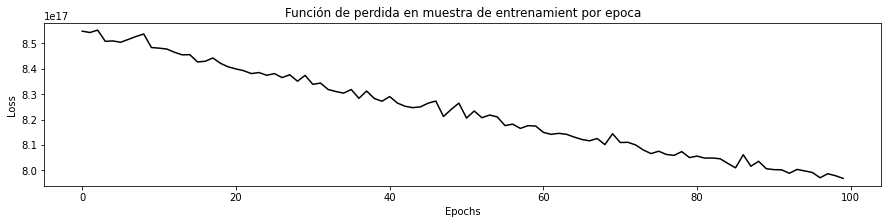

In [54]:
fig, ax = plt.subplots(figsize=(15,3))
ax.set(title="Función de perdida en muestra de entrenamient por epoca")      
ax.plot(history.history['loss'], color='black')    
ax.set_xlabel('Epochs')    
ax.set_ylabel('Loss', color='black')    


Text(0, 0.5, 'Loss')

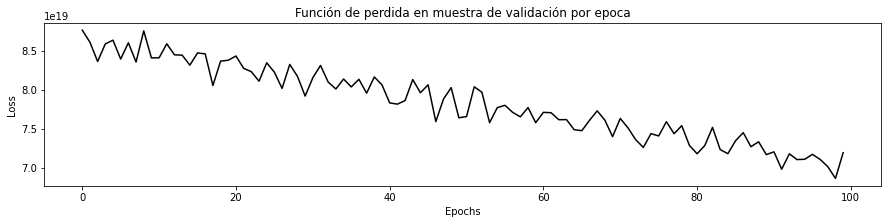

In [53]:
fig, ax = plt.subplots(figsize=(15,3))
       
  
ax.set(title="Función de perdida en muestra de validación por epoca")      
ax.plot(history.history['val_loss'], color='black')    
ax.set_xlabel('Epochs')    
ax.set_ylabel('Loss', color='black')    


## **Defining a validation metric**

In [84]:
def rsme(y_true, y_pred):

    return (K.mean(K.square(y_pred - y_true)))

In [86]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(215, activation='linear'))
model.add(Dense(40, activation='linear'))
model.add(Dense(215, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss=rsme, optimizer='adam')

In [87]:
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 3570540591022342144.0000 - val_loss: 2819652764332720128.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 3570460326673514496.0000 - val_loss: 2819259414047883264.0000
Epoch 3/100
24/24 [==============================] - 0s 881us/step - loss: 3569960598638690304.0000 - val_loss: 2817039225193496576.0000
Epoch 4/100
24/24 [==============================] - 0s 951us/step - loss: 3567664268604080128.0000 - val_loss: 2808203549752688640.0000
Epoch 5/100
24/24 [==============================] - 0s 908us/step - loss: 3559405836767854592.0000 - val_loss: 2779470012384018432.0000
Epoch 6/100
24/24 [==============================] - 0s 950us/step - loss: 3535491458863726592.0000 - val_loss: 2709497642148167680.0000
Epoch 7/100
24/24 [==============================] - 0s 951us/step - loss: 3474376204545425408.0000 - val_loss: 2577066964140687360.0000
Epoch 8/100
24/24 [==========================

## **Early stopping callback method**

In [91]:
call=tf.keras.callbacks.EarlyStopping(
    ##Metrica a monitoriar
    monitor='val_loss',
    ##Cuanto debe "dejar de mejorar"
    min_delta=0,
    ## Cuantas épocas esperar
    patience=3,
    verbose=0,
    ##max,min,aunto
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [94]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(215, activation='linear'))
model.add(Dense(40, activation='linear'))
model.add(Dense(215, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[call])

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 3570543064923504640.0000 - val_loss: 2819678877733879808.0000
Epoch 2/100
24/24 [==============================] - 0s 997us/step - loss: 3570519700301414400.0000 - val_loss: 2819539789512966144.0000
Epoch 3/100
24/24 [==============================] - 0s 954us/step - loss: 3570353124289806336.0000 - val_loss: 2818729449443295232.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 3569566698598039552.0000 - val_loss: 2815454004304150528.0000
Epoch 5/100
24/24 [==============================] - 0s 953us/step - loss: 3566622206458855424.0000 - val_loss: 2805379454136745984.0000
Epoch 6/100
24/24 [==============================] - 0s 954us/step - loss: 3558616937174925312.0000 - val_loss: 2780481563081572352.0000
Epoch 7/100
24/24 [==============================] - 0s 946us/step - loss: 3540893359490990080.0000 - val_loss: 2727904841186672640.0000
Epoch 8/100
24/24 [==========================

## **Dropout**

In [98]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(215, activation='linear'))
model.add(Dense(40, activation='linear'))
model.add(Dense(215, activation='relu'))
Dropout( rate=0.2)
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[call])

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 3570542790045597696.0000 - val_loss: 2819674204809461760.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 3570515302254903296.0000 - val_loss: 2819501306605993984.0000
Epoch 3/100
24/24 [==============================] - 0s 976us/step - loss: 3570289352615395328.0000 - val_loss: 2818464742018908160.0000
Epoch 4/100
24/24 [==============================] - 0s 996us/step - loss: 3569324531162021888.0000 - val_loss: 2814308038310100992.0000
Epoch 5/100
24/24 [==============================] - 0s 911us/step - loss: 3565806093953138688.0000 - val_loss: 2801221650916311040.0000
Epoch 6/100
24/24 [==============================] - 0s 996us/step - loss: 3555277720361369600.0000 - val_loss: 2767727777955184640.0000
Epoch 7/100
24/24 [==============================] - 0s 995us/step - loss: 3531776483951378432.0000 - val_loss: 2702900572381511680.0000
Epoch 8/100
24/24 [==========================

## **Learning rate**

In [139]:
model = Sequential()
model.add(Dense(12, input_dim=33, activation='relu'))
model.add(Dense(215, activation='linear'))
model.add(Dense(40, activation='linear'))
model.add(Dense(215, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [140]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))


Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 3570543064923504640.0000 - val_loss: 2819679702367600640.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 3570522174202576896.0000 - val_loss: 2819541163902500864.0000
Epoch 3/100
24/24 [==============================] - 0s 931us/step - loss: 3570340754783993856.0000 - val_loss: 2818662928989814784.0000
Epoch 4/100
24/24 [==============================] - 0s 911us/step - loss: 3569575494691061760.0000 - val_loss: 2815051583048384512.0000
Epoch 5/100
24/24 [==============================] - 0s 955us/step - loss: 3566631277429784576.0000 - val_loss: 2803305775206760448.0000
Epoch 6/100
24/24 [==============================] - 0s 912us/step - loss: 3558218639087763456.0000 - val_loss: 2773371571140558848.0000
Epoch 7/100
24/24 [==============================] - 0s 952us/step - loss: 3538604176281960448.0000 - val_loss: 2711440754072354816.0000
Epoch 8/100
24/24 [==========================

In [141]:
mse(y_test, model.predict(x_test))

8.783891224661334e+19

In [ ]:
a=0.01

In [ ]:
lista=[]
for i in range(0,10):
    model = Sequential()
    model.add(Dense(12, input_dim=33, activation='relu'))
    model.add(Dense(215, activation='linear'))
    model.add(Dense(40, activation='linear'))
    model.add(Dense(215, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))
    n={}
    n['error_fuera']=mse(y_test, model.predict(x_test))
    n['learning']=a
    a+=0.01
    lista.append(a)
